In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import *
import numpy as np

In [3]:
def jacobiIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C = sum([A[i][j] * x_k[j] for j in range(i)]) + sum([A[i][j] * x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i] - C)/A[i][i])
    return(x_k1)

def gaussSeidelIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C= sum([A[i][j]*x_k1[j] for j in range(i)])
        D= sum([A[i][j]*x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i]-C-D)/A[i][i])
    return(x_k1)

In [35]:
def poissonMatrix(n):
    size = n * (n-2) + 2 * (n - 2)
    #matrix initialization
    A = [[0 for j in range(size)] for i in range(size)]

    #matrix rows corresponding to upper boundary conditions
    for i in range(n-2):
        A[i][i] = 1
    
    for i in range(n-2, size - (n-2)):
        if ((i - (n-2)) % n == 0) or ((i - (n-2 + n - 1))%n==0):
            A[i][i] = 1
        else:
            A[i][i] = 4
            A[i][i-1] = -1
            A[i][i+1] = -1
            A[i][i - (n-1)] = -1        #n-1
            A[i][i + (n-1)] = -1

    #for the lower boundary conditions
    for i in range(size - (n-2), size):
        A[i][i] = 1
    
    return A

def testF(n,g,f):
    out = []
    for i in range(n-2):
        out.append(g[i])

    for i in range(n-2):
        out.append(g[2*i + (n-2)])
        for j in range(n-2):
            out.append(f[i*(n-2) + j])
        out.append(g[2*i + (n-2)+1])

    for i in range(len(g) - (n-2), len(g)):
        out.append(g[i])
    
    return out

def formatSol(n,u):
    out = []
    temp = [0]


    for i in range(n-2):
        temp.append(u[i])
    temp.append(0)

    out.append(temp)

    for i in range(n-2):
        temp = []
        for j in range((n-2)+(i*n),(n-2)+((i+1)*n)):
            temp.append(u[j])
        out.append(temp)

    temp = [0]
    for i in range(len(u)-(n-2),len(u)):
        temp.append(u[i])
    temp.append(0)
    out.append(temp)

    return out

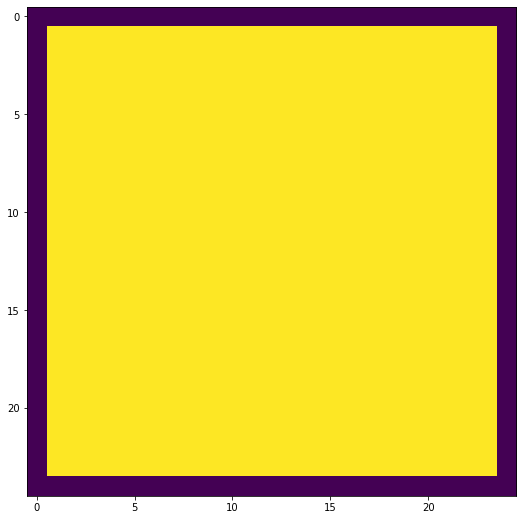

In [36]:
N = 25
mat = poissonMatrix(N)

g = [0 for i in range((N-2) * 4)]
fi = [2 for i in range((N-2) * (N-2))]
#fi[int((N-2)/2)*(N-2)+int((N-2)/2)] = -10

'''
for i in range(int((N-2)/3),int(2*(N-2)/3)):
    for j in range(int((N-2)/3),int(2*(N-2)/3)):
        fi[i*(N-2)+j] = 1
'''

f = testF(N,g,fi)

u0 = [0 for i in range(len(mat))]

#Now we can just print the
sol = formatSol(N,f)

s0 = np.matrix(sol)
plt.imshow(s0)
plt.show()

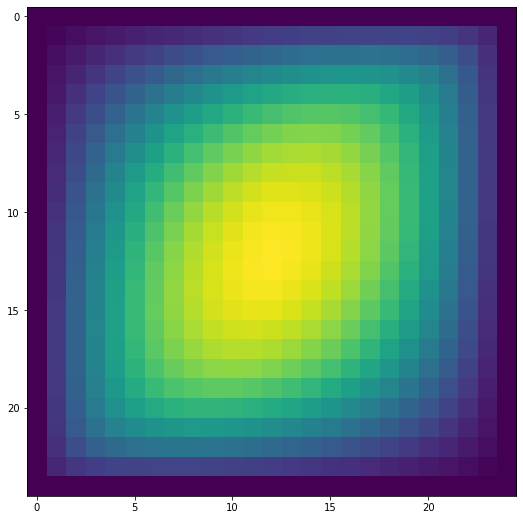

In [37]:
niter = 100
for i in range(niter):
    u0 = gaussSeidelIteration(u0,mat,f)

sol = formatSol(N,u0)

s1 = np.matrix(sol)
plt.imshow(s1)
plt.show()

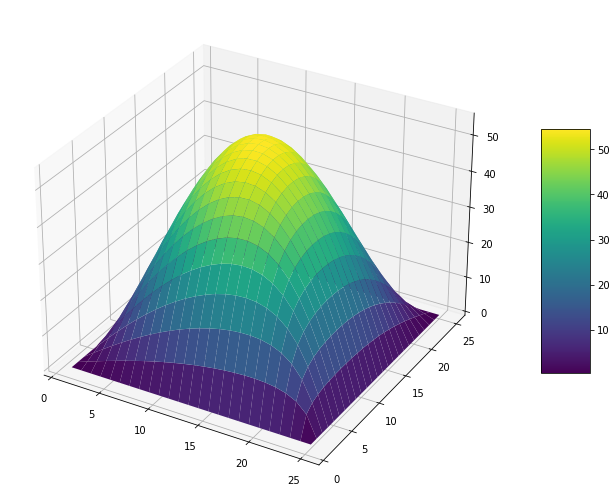

In [38]:
X = np.arange(1,N+1)
Y = np.arange(1,N+1)

X,Y = np.meshgrid(X,Y)

plt.rcParams['figure.figsize'] = [16,9]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,s1,cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

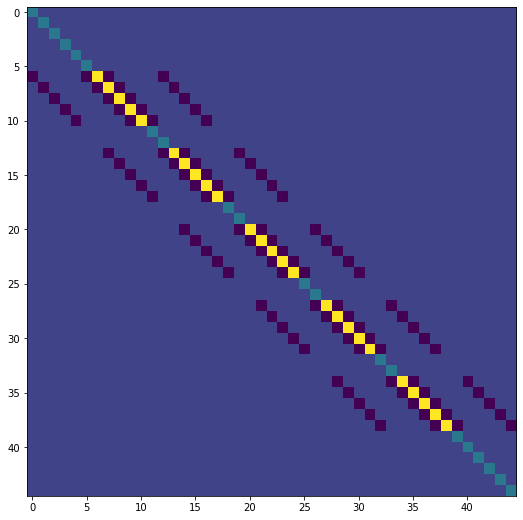

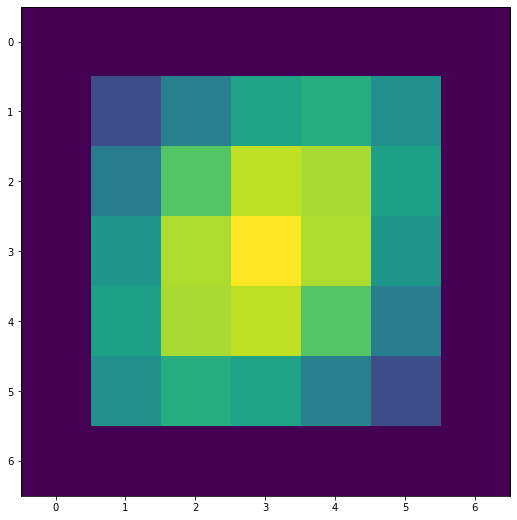

In [18]:
m = np.matrix(mat)

plt.imshow(m)
plt.show()

f = np.array(f)

s = np.linalg.solve(m,f)
sol = formatSol(N,s)

s2 = np.matrix(sol)
plt.imshow(s2)
plt.show()

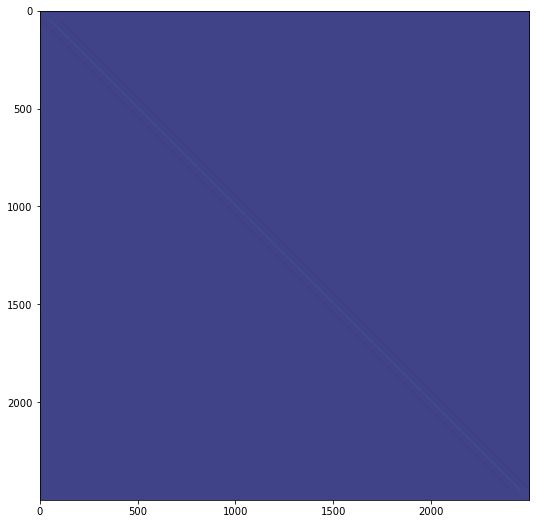

2500
2500


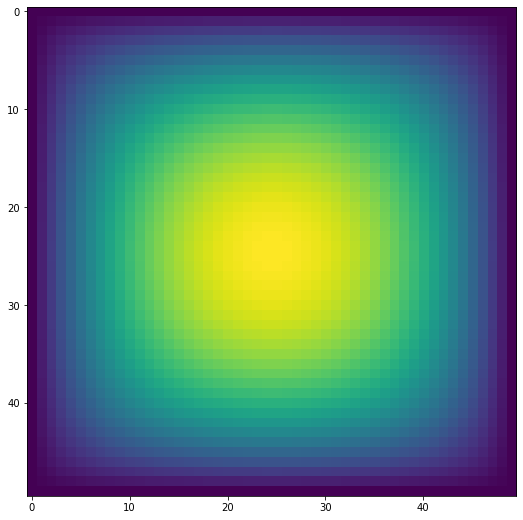

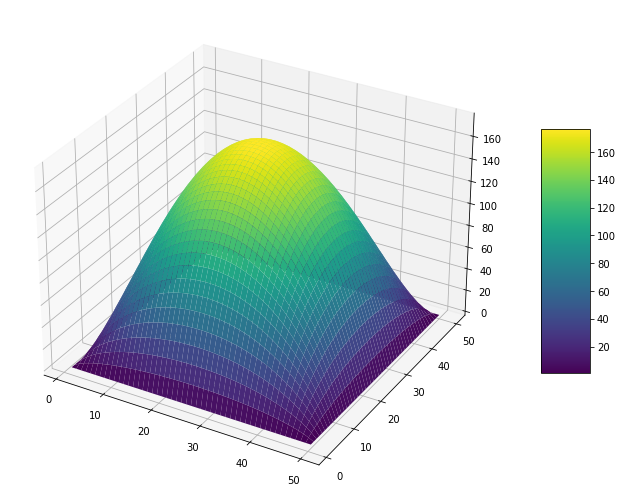

In [72]:
def poissonMatrix1(n):
    m = n
    size = n * (n-2) + 2 * m
    #matrix initialization
    A = [[0 for j in range(size)] for i in range(size)]

    #matrix rows corresponding to upper boundary conditions
    for i in range(m):
        A[i][i] = 1
    
    for i in range(m, size - m):
        if ((i - m) % n == 0) or ((i - (m + n - 1))%n==0):
            A[i][i] = 1
        else:
            A[i][i] = 4
            A[i][i-1] = -1
            A[i][i+1] = -1
            A[i][i - (n)] = -1
            A[i][i + (n)] = -1

    #for the lower boundary conditions
    for i in range(size - m, size):
        A[i][i] = 1
    
    return A


def testF1(n,g,f):
    out = []
    m = n
    for i in range(m):
        out.append(g[i])

    for i in range(n-2):
        out.append(g[2*i + (m)])
        for j in range(n-2):
            out.append(f[i*(n-2) + j])
        out.append(g[2*i + (m)+1])

    for i in range(len(g) - (m), len(g)):
        out.append(g[i])
    
    return out

def formatSol1(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return out

N = 50
mat = np.matrix(poissonMatrix1(N))
plt.imshow(mat)
plt.show()

g = [0 for i in range((N-2) * 4 + 4)]
fi = [1 for i in range((N-2) * (N-2))]
#fi[int((N-2)/2)*(N-2)+int((N-2)/2)] = 1


f1 = testF1(N,g,fi)
print(len(mat))
print(len(f1))

s3 = np.linalg.solve(mat,f1)
sol1 = np.matrix(formatSol1(N,s3))

plt.imshow(sol1)
plt.show()


X = np.arange(1,N+1)
Y = np.arange(1,N+1)

X,Y = np.meshgrid(X,Y)

plt.rcParams['figure.figsize'] = [16,9]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol1,cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
